# Finance Data Project 

In this data project we will focus on exploratory data analysis of American bank stock prices during the 2008 financial crisis all the way to the early 2016s. 

This project is meant to practice  python, data visualization, and it's external libraries such as; Pandas, Matplot, Seaborn, Numpy.

### Imports

In [1]:
import pandas_datareader.data as wb
import pandas as pd
import numpy as np
import datetime 
import os 
# conda install -c conda-forge yfinance
import yfinance as yfin

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
%matplotlib inline

## Retrieving Data
Using pandas we will directly read data from Yahoo finance. We will retrieve the following stock information for the following banks: Bank of America, CitiGroup, Goldman Sachs, JPMorgan Chase, Morgan Stanley, Wells Fargo

1. Use datetime to set start and end datetime objects.
2. Figure out the ticker symbol for each bank.
2. Figure out how to use datareader to grab info on the stock.

[documentation page](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html) 
    

In [4]:
import datetime
# start = datetime.date(2006, 1, 1) (use datetime to set START and END)
start = "2006-01-01"
end = "2016-01-01"

In [5]:
#Tickers for Each Bank: Bank of America - BAC , CitiGroup - C, Goldman Sachs - GS , JPMorgan Chase - JPM, Morgan Stanley MS, Wells Fargo - WFC
yfin.pdr_override()
# Bank of America
BAC = wb.get_data_yahoo("BAC", start, end)
# CitiGroup 
C = wb.DataReader('C', start, end)
# Goldman Sachs 
GS = wb.DataReader('GS', start, end)
# JPMorgan Chase
JPM = wb.DataReader('JPM', start, end)
# Morgan Stanley
MS = wb.DataReader('MS', start, end)
# Wells Fargo
WFC = wb.DataReader('WFC', start, end)
# WFC.head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


** List used of the ticker symbols (as strings) in alphabetical order. **

In [8]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', ' WFC']

** Using pandas.concat, to concatenate the bank dataframes together to a single data frame called bank_stocks. **

In [15]:
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC], axis = 1, keys=tickers)

** column name levels: **

In [16]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

** head of the bank_stocks dataframe.**

In [17]:
bank_stocks.head()

Bank Ticker        BAC                                                        \
Stock Info        Open       High        Low      Close  Adj Close    Volume   
Date                                                                           
2006-01-03   46.919998  47.180000  46.150002  47.080002  32.425438  16296700   
2006-01-04   47.000000  47.240002  46.450001  46.580002  32.081081  17757900   
2006-01-05   46.580002  46.830002  46.320000  46.639999  32.122402  14970700   
2006-01-06   46.799999  46.910000  46.349998  46.570000  32.074188  12599800   
2006-01-09   46.720001  46.970001  46.360001  46.599998  32.094860  15619400   

Bank Ticker           C                                      ...         MS  \
Stock Info         Open        High         Low       Close  ...        Low   
Date                                                         ...              
2006-01-03   490.000000  493.799988  481.100006  492.899994  ...  56.740002   
2006-01-04   488.600006  491.000000  483.500000  483.799988  ...  58.349998   
2006-01-05   484.399994  487.799988  484.000000  486.200012  ...  58.020000   
2006-01-06   488.799988  489.000000  482.000000  486.200012  ...  58.049999   
2006-01-09   486.000000  487.399994  483.000000  483.899994  ...  58.619999   

Bank Ticker                                       WFC                        \
Stock Info       Close  Adj Close   Volume       Open       High        Low   
Date                                                                          
2006-01-03   58.310001  33.995922  5377000  31.600000  31.975000  31.195000   
2006-01-04   58.349998  34.019245  7977800  31.799999  31.820000  31.365000   
2006-01-05   58.509998  34.112511  5778000  31.500000  31.555000  31.309999   
2006-01-06   58.570000  34.147507  6889800  31.580000  31.775000  31.385000   
2006-01-09   59.189999  34.508980  4144500  31.674999  31.825001  31.555000   

Bank Ticker                                  
Stock Info       Close  Adj Close    Volume  
Date                                         
2006-01-03   31.900000  19.542273  11016400  
2006-01-04   31.530001  19.315609  10870000  
2006-01-05   31.495001  19.294159  10158000  
2006-01-06   31.680000  19.407495   8403800  
2006-01-09   31.674999  19.404438   5619600  

[5 rows x 36 columns]

# EDA

documentation: [Multi-Level Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html) and [Using .xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html).

** What is the max Close price for each bank's stock throughout the time period?**

In [21]:
#https://stackoverflow.com/questions/25189575/pandas-dataframe-select-columns-in-multiindex
max = bank_stocks.xs(key='Close', level='Stock Info', axis = 1, drop_level = False).max()
max

Bank Ticker  Stock Info
BAC          Close          54.900002
C            Close         564.099976
GS           Close         247.919998
JPM          Close          70.080002
MS           Close          89.300003
 WFC         Close          58.520000
dtype: float64

** Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [22]:
returns = pd.DataFrame()

** Using pandas pct_change() method on the Close column to create a column representing this return value. I created a for loop that goes through each Bank Stock Ticker, this creates the returns column and set's it as a column in the returns DataFrame.**

In [23]:
# bank_stocks.xs('BAC', level='Bank Ticker',  axis=1).pct_change()
for tick in tickers: 
    returns[tick  + ' Returns'] = bank_stocks[tick]['Close'].pct_change()
returns.head()

,BAC Returns,C Returns,GS Returns,JPM Returns,MS Returns,WFC Returns
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


** Using seaborn I created a pairplot for the returns dataframe. Morgan Stanley is the lowest, in growth JPM & WFC, seem to be the highest.**

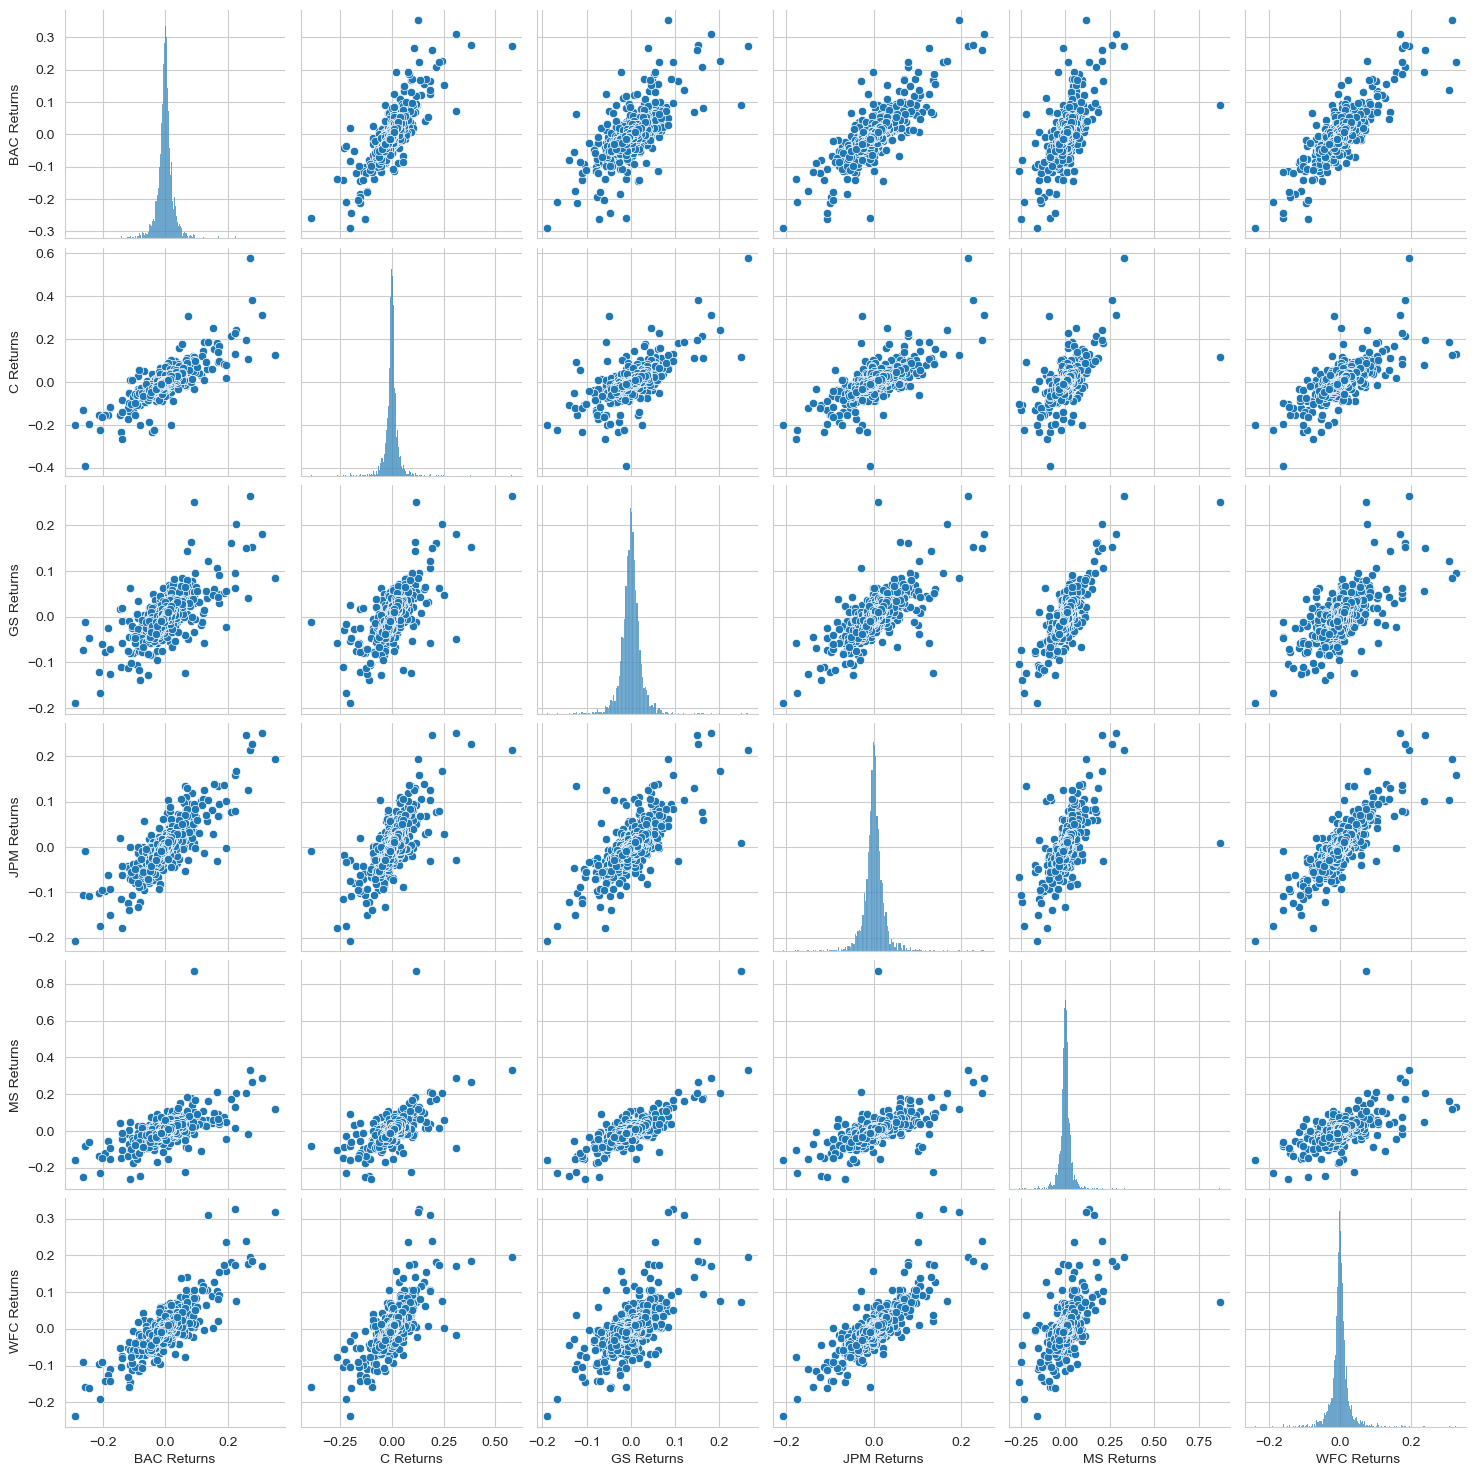

In [24]:
sns.pairplot(data = returns[1:])

# Morgan Stanley is the lowest, in growth JPM & WFC, seem to be the highest 
# Citicgroup, Straigt line, huge stock carash, nov 2008 Citigroup was insolvent, story behind data analysis?

** Using the returns DataFrame.
 Here are the dates of each bank stock that had the best and worst single day returns. 4 banks share the same day for the worst drop. 2009-01-20, Barack Obama inauguration had negatively affeceted the stock market.**

In [25]:
returns.idxmin()
# 2009-01-20, Barack Obama inauguration. 4 banks returned same day of worst day drops

BAC Returns    2009-01-20
C Returns      2009-02-27
GS Returns     2009-01-20
JPM Returns    2009-01-20
MS Returns     2008-10-09
 WFC Returns   2009-01-20
dtype: datetime64[ns]

In [26]:
returns.idxmax()
#analysis: Morgan lost 80% of its market, 42% slide in its share price in 2 days, JP Morgans next day is better 

BAC Returns    2009-04-09
C Returns      2008-11-24
GS Returns     2008-11-24
JPM Returns    2009-01-21
MS Returns     2008-10-13
 WFC Returns   2008-07-16
dtype: datetime64[ns]

** 
After close evaluation of the Standard Deviation of the returns, Citi Group would be classified as the riskiest bank stcok for the year of 2015.
**

In [28]:
returns.std()
# Review Citi Group

BAC Returns     0.036647
C Returns       0.038672
GS Returns      0.025390
JPM Returns     0.027667
MS Returns      0.037819
 WFC Returns    0.030238
dtype: float64

In [29]:
# returns.reset_index()[returns.reset_index()['Date'].dt.year == 2015].std()
returns.loc['2015-01-01': '2015-12-31'].std()
# returns.ix['2015-01-01': '2015-12-31'].std()
# the closer the STD is to 1 the less distribution, the lower the better 
# the closer the STD is the more distrubution, the lower, the least
# Therefor WFC is the most volatile in 2015

# May 6th 2011, Citi Group Announces Reverse Stock Split, Intends to Reiin statege 

BAC Returns     0.016163
C Returns       0.015289
GS Returns      0.014046
JPM Returns     0.014017
MS Returns      0.016249
 WFC Returns    0.012591
dtype: float64

** Using seaborn, I created a distplot of the 2015 returns for Morgan Stanley **

/Users/josearnel/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MS Returns', ylabel='Density'>

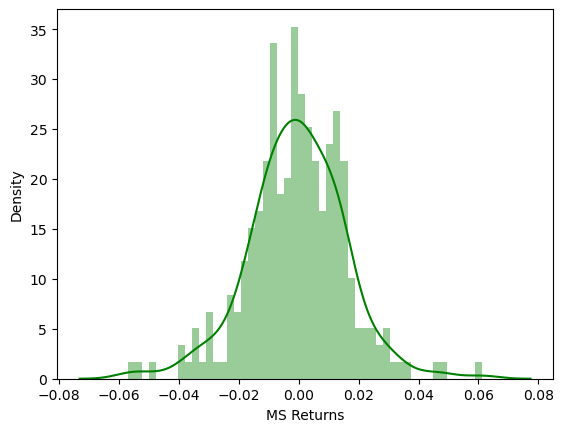

In [28]:
import seaborn as sns

sns.distplot(returns.loc['2015-01-01': '2015-12-31']['MS Returns'], color = 'green', bins = 50)

** Using seaborn I created a distplot of the 2008 returns for CitiGroup **

/Users/josearnel/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

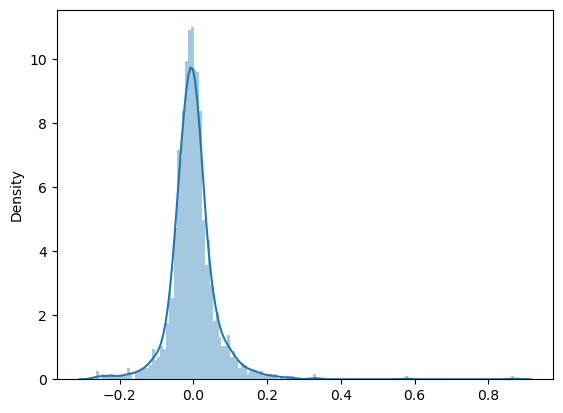

In [29]:
sns.distplot(returns.loc['2008-01-01': '2008-12-31' ],bins = 150)
# sns.distplot(returns.loc['2008-01-01': '2008-12-31' ]['C Return'], color = 'red', bins = 150)
# financial crisis that the stock when throug

____
# More Visualization

A lot of this project will focus on visualizations. Feel free to use any of your preferred visualization libraries to try to recreate the described plots below, seaborn, matplotlib, plotly and cufflinks, or just pandas.

### Imports

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

** Create a line plot showing Close price for each bank for the entire index of time. (Hint: Try using a for loop, or use [.xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html) to get a cross section of the data.)**

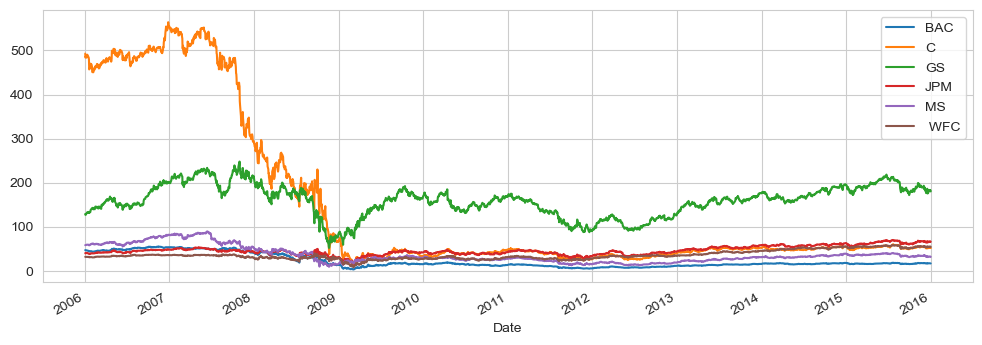

In [22]:
for ticks in tickers:
    bank_stocks[ticks]['Close'].plot(label = ticks, figsize=(12,4))
plt.legend()


In [32]:
# bank_stocks.xs('Close', axis=1, level='Stock Info').plot() 
# # bank_stocks.xs('Close', axis=1, level='Stock Info').iplot() # Cufflinks 
# play around

<AxesSubplot:xlabel='Date'>

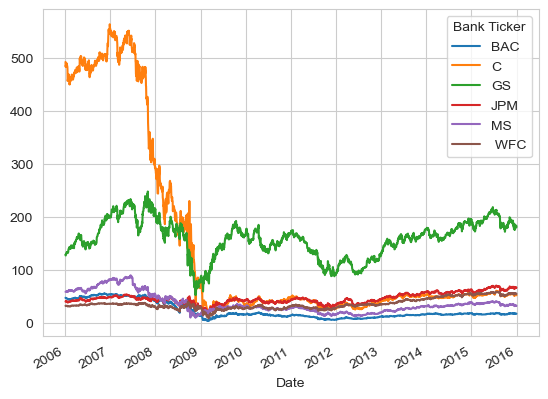

In [33]:
# bank_stocks.xs()['Close'].plot()
#xs(key, axis=0, level=None, drop_level=True)[source]# 
bank_stocks.xs(key = 'Close', level= 'Stock Info', axis = 1).plot()

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

** Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

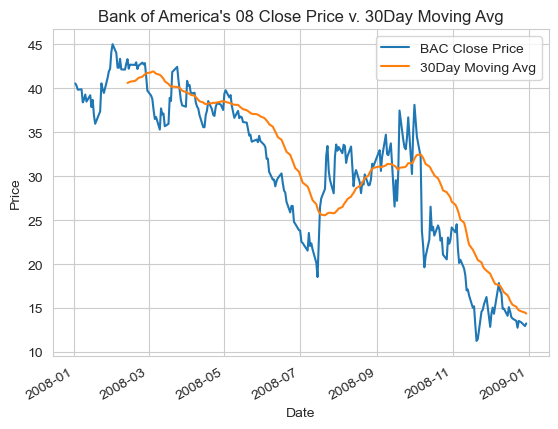

In [25]:
BACma = BAC.loc['2008-01-01': '2008-12-30']['Close'].rolling(30).mean()

# 30day rolling average, 
BAC.loc['2008-01-01': '2008-12-30']['Close'].plot(label='BAC Close Price')
BACma.plot(label='30Day Moving Avg')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title("Bank of America's 08 Close Price v. 30Day Moving Avg")
plt.legend()

In [35]:
# plt.figure(figsize = (12,4))
# BAC['Close'].ix['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 day Mov')
# BAC['Close'].ix['2008-01-01':'2009-01-01'].plot(label='BAC Close')
# plt.legend()

** Heatmap of the correlation between the stocks Close Price.**

<AxesSubplot:xlabel='Bank Ticker', ylabel='Bank Ticker'>

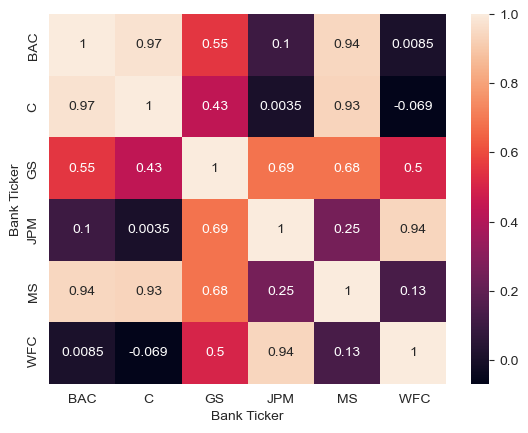

In [38]:
# sns.clustermap(corr, annot = True)
import seaborn as sns
corr = bank_stocks.xs(key= 'Close', level = 'Stock Info', axis = 1).corr()
# corr = bank_stocks['Close'].corr()
#bank_stocks.xs(key= 'Close', level = 'Stock Info'
corr
# bank_stocks.head()
sns.heatmap(corr, annot = True)

** Seaborn's clustermap to cluster the correlations together:**

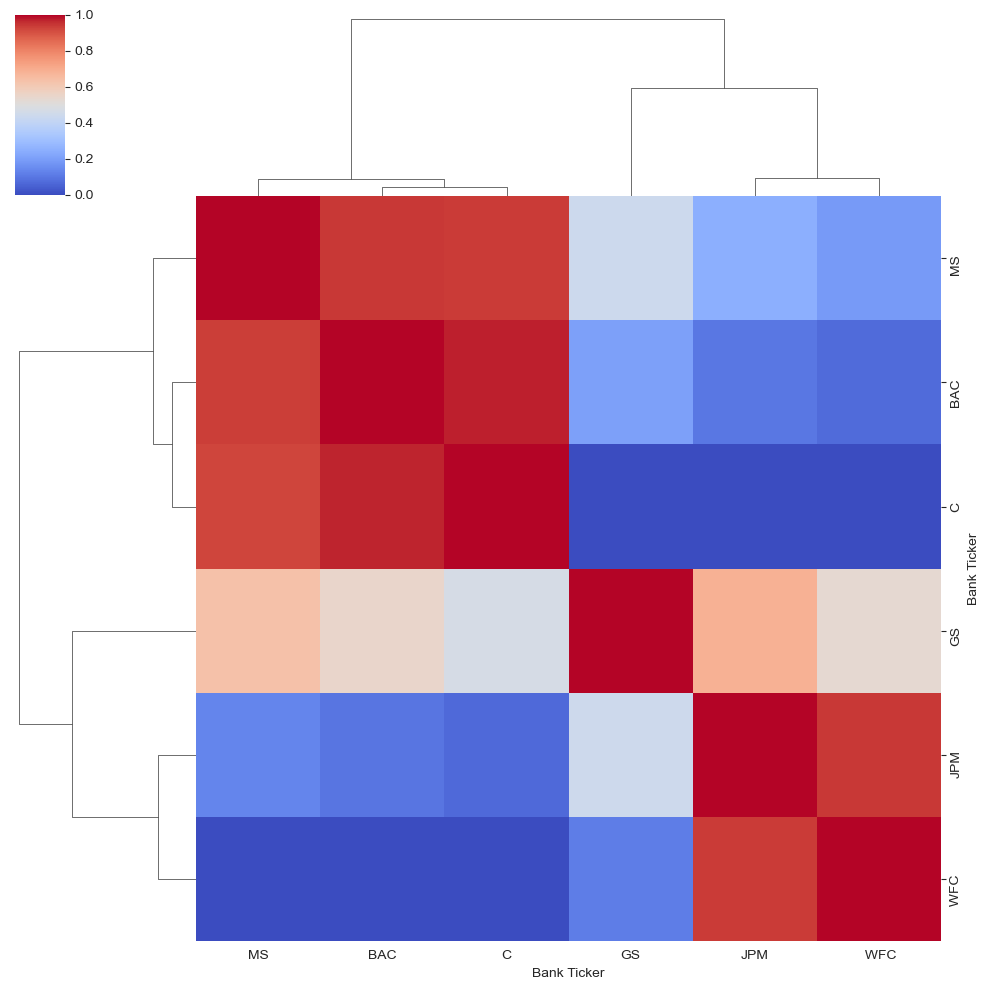

In [32]:
sns.clustermap(corr ,cmap='coolwarm',standard_scale=1)

# Part 2 (Optional)

In this second part of the project we will rely on the cufflinks library to create some Technical Analysis plots. This part of the project is experimental due to its heavy reliance on the cuffinks project, so feel free to skip it if any functionality is broken in the future.

** Use .iplot(kind='candle) to create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.**

In [42]:
.iplot(kind='candle)

SyntaxError: invalid syntax (2816623395.py, line 1)

** Use .ta_plot(study='sma') to create a Simple Moving Averages plot of Morgan Stanley for the year 2015.**

**Use .ta_plot(study='boll') to create a Bollinger Band Plot for Bank of America for the year 2015.**

# Great Job!

Definitely a lot of more specific finance topics here, so don't worry if you didn't understand them all! The only thing you should be concerned with understanding are the basic pandas and visualization oeprations.